In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

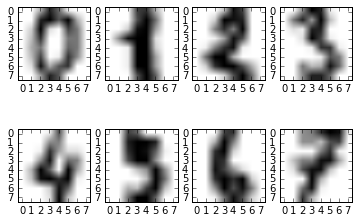

In [2]:
digits = pd.DataFrame(load_digits()["data"])
target = pd.Series(load_digits()["target"])

rows = [0,100,200,300,1000,1100,1200,1300]

fig = plt.figure()

for r in range(len(rows)):
    ax = fig.add_subplot(2,4,r+1)
    shaped = digits.iloc[r].values.reshape(8,8)
    ax.imshow(shaped, cmap="gray_r")

In [3]:
def cross_validate(k):
    kf = KFold(n_splits=4, random_state=1)
    accuracies = []
    for train_index, test_index in kf.split(digits):
        knc = KNeighborsClassifier(n_neighbors=k)
        knc.fit(digits.iloc[train_index], target.iloc[train_index])
        knc_pred = knc.predict(digits.iloc[test_index])
        acc = accuracy_score(target.iloc[test_index], knc_pred)
        accuracies.append(acc)
    return np.mean(accuracies)
        
k_acc = []
    
for k in range(1,11):
    k_acc_res = cross_validate(k)
    print(k, ": ",k_acc_res)
    k_acc.append(k_acc_res)

1 :  0.9677233358079684
2 :  0.9616010888393962
3 :  0.9627183865379857
4 :  0.9649480326651819
5 :  0.9621665429349171
6 :  0.9588270230141054
7 :  0.9571591190299431
8 :  0.9571578817124474
9 :  0.9543801039346697
10 :  0.9527097253155159


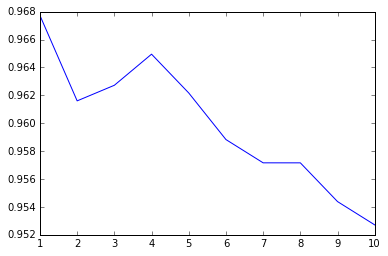

In [4]:
plt.plot(range(1,11), k_acc)

Using 4 KFold and various parameter for N Nearest Neighbors Classifier, we have around 96% accuracy when parameter is below 7.
As the N Neighbors parameter go up, the accuracy goes down.

Next, we will try to use single hidden layer Neural Network containing different number of neurons in the single hidden layer. 

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
neurons = [8,16,32,64,128,256]

def nn_cross_validate(k):
    kf = KFold(n_splits=4, random_state=1)
    accuracies = []
    for train_index, test_index in kf.split(digits):
        mlpc = MLPClassifier(hidden_layer_sizes=(k,), activation="relu")
        mlpc.fit(digits.iloc[train_index], target.iloc[train_index])
        mlpc_pred = mlpc.predict(digits.iloc[test_index])
        acc = accuracy_score(target.iloc[test_index], mlpc_pred)
        accuracies.append(acc)
    return np.mean(accuracies)

n_acc = []

for n in neurons:
    n_acc_res = nn_cross_validate(n)
    print(n, ": ", n_acc_res)
    n_acc.append(n_acc_res)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



8 :  0.8336142044048502
16 :  0.9042873051224944
32 :  0.9376651818856719
64 :  0.9293157634248949
128 :  0.9421244741400643
256 :  0.9538121752041574


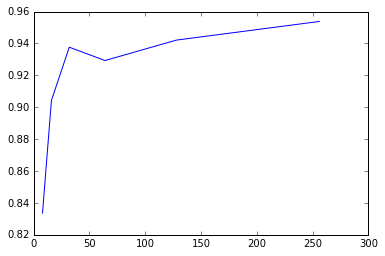

In [7]:
plt.plot(neurons, n_acc)

Adding more neurons in the single hidden layer improves the accuracy of the model from 83% using 8 neurons to 95% using 256 neurons. Although we can see clearly that this method isn't superior to the N Nearest Neighbor Classifier model that had 96% accuracy.

In [8]:
def nn_2_cross_validate(k1, k2):
    kf = KFold(n_splits=4 ,random_state=1)
    accuracies = []
    
    for train_index, test_index in kf.split(digits):
        mlpc = MLPClassifier(hidden_layer_sizes=(k1,k2), activation="relu")
        mlpc.fit(digits.iloc[train_index], target.iloc[train_index])
        mlpc_pred = mlpc.predict(digits.iloc[test_index])
        acc = accuracy_score(target.iloc[test_index], mlpc_pred)
        accuracies.append(acc)
    return np.mean(accuracies)

acc_64 = nn_2_cross_validate(64,64)

In [9]:
print(acc_64)

0.9426713684731503


Accuracy of using 2 hidden layer of 64 neurons each layer is 94%. Previously a one hidden layer 64 neurons model had an accuracy of 93%. A slight improvement of 1%.

Next we will try 3 hidden layers and 6 k-fold cross validation.

In [11]:
nnn_neurons = [10,64,128]

def nn_3_cross_validate(k):
    kf = KFold(n_splits=6, random_state=1)
    accuracies = []
    
    for train_index, test_index in kf.split(digits):
        mlpc = MLPClassifier(hidden_layer_sizes=(k,k,k), activation="relu")
        mlpc.fit(digits.iloc[train_index], target.iloc[train_index])
        mlpc_pred = mlpc.predict(digits.iloc[test_index])
        acc = accuracy_score(target.iloc[test_index], mlpc_pred)
        accuracies.append(acc)
    return np.mean(accuracies)

nn_3_acc = []

for n in nnn_neurons:
    nn_3 = nn_3_cross_validate(n)
    print(n, ": ", nn_3)
    nn_3_acc.append(nn_3)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



10 :  0.8842586399108138
64 :  0.9504775176514307
128 :  0.9549256781865477


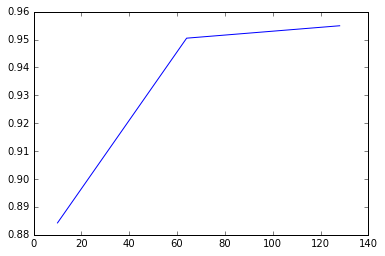

In [12]:
plt.plot(nnn_neurons, nn_3_acc)

There is another slight improvement again of 0.8% to 95% accuracy in the 3 hidden layers of 64 neurons each. And we see the same pattern where as the number of neurons increase in each hidden layer, the accuracy increases as well.